In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d arjuntejaswi/plant-village

 99% 326M/329M [00:15<00:00, 24.2MB/s]
100% 329M/329M [00:15<00:00, 22.1MB/s]


In [ ]:
# import zipfile

# zip_ref = zipfile.ZipFile('/content/plant-village.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
# # importing dataset
# import os

# dir = os.listdir('/content/PlantVillage')
# for filenames in dir:
#     print(filenames)

Tomato_Spider_mites_Two_spotted_spider_mite
Potato___healthy
Tomato_healthy
Potato___Early_blight
Potato___Late_blight
Tomato_Late_blight
Tomato_Early_blight
Tomato_Bacterial_spot
Pepper__bell___healthy
Tomato_Septoria_leaf_spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Leaf_Mold
Tomato__Target_Spot
Pepper__bell___Bacterial_spot


In [ ]:
# !cp -rf /content/PlantVillage/Potato___healthy ./PlantVillage1/Potato___healthy

In [ ]:
# !cp -rf ../content/PlantVillage/Potato___Late_blight ./PlantVillage1/Potato___Late_blight1

In [ ]:
# !cp -rf ../content/PlantVillage/Potato___Early_blight ./PlantVillage1/Potato___Early_blight

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [28]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle = True,
        image_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)       # because batch is 32 so 32*68

68

In [6]:
32 * 68

2176

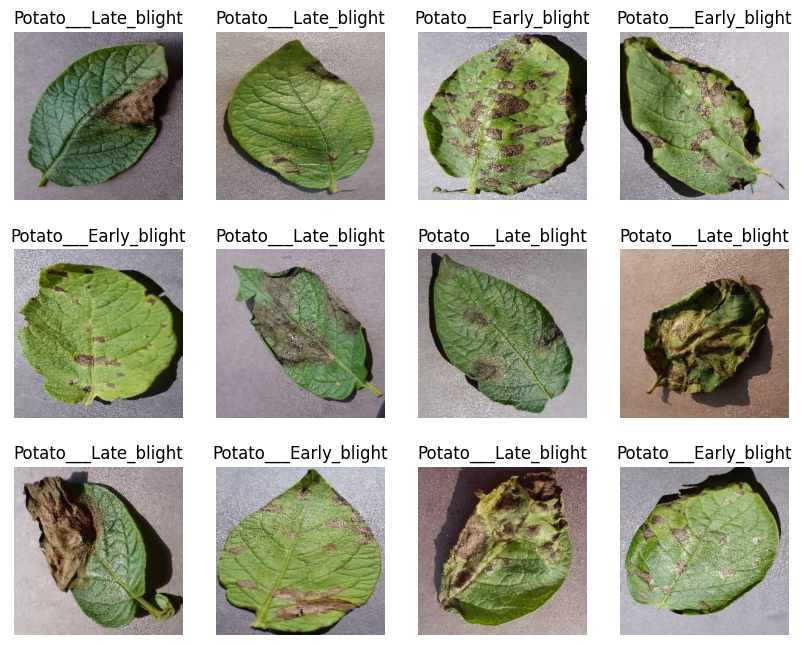

In [7]:
plt.figure(figsize = (10, 8))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
# dataset.take(1)

- **80% ==>  training dataset**
- **20% ==> 10% test dataset, 10% validation**

In [8]:
train_size = 0.8       # train_ds is 80% of dataset

len(dataset) * train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)   # take 1st 54 bactch data
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)      # skip 1st 54 batch data and store remaining all
len(test_ds)

14

In [11]:
val_size = 0.1      # validation is 10% of dataset

len(dataset) * val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, 
                              shuffle=True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    test_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(test_size)
    test_ds = ds.skip(train_size).skip(test_size)
    
    return train_ds, test_ds, val_ds

In [15]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(test_ds)

6

In [18]:
len(val_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
data_augmentation

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [25]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
     
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [27]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds, verbose=1)

Epoch 1/20
54/54 [==============================] - 302s 5s/step - loss: 0.9135 - accuracy: 0.4994 - val_loss: 0.8352 - val_accuracy: 0.4884
Epoch 2/20
54/54 [==============================] - 215s 4s/step - loss: 0.6095 - accuracy: 0.7743 - val_loss: 0.5482 - val_accuracy: 0.8142
Epoch 3/20
54/54 [==============================] - 218s 4s/step - loss: 0.4045 - accuracy: 0.8484 - val_loss: 0.3629 - val_accuracy: 0.8686
Epoch 4/20
54/54 [==============================] - 247s 5s/step - loss: 0.3144 - accuracy: 0.8738 - val_loss: 0.3513 - val_accuracy: 0.8802
Epoch 5/20
54/54 [==============================] - 353s 7s/step - loss: 0.2567 - accuracy: 0.8953 - val_loss: 0.2280 - val_accuracy: 0.9115
Epoch 6/20
54/54 [==============================] - 274s 5s/step - loss: 0.2268 - accuracy: 0.9028 - val_loss: 0.1881 - val_accuracy: 0.9334
Epoch 7/20
54/54 [==============================] - 278s 5s/step - loss: 0.1646 - accuracy: 0.9369 - val_loss: 0.1846 - val_accuracy: 0.9340
Epoch 8/20
54

In [30]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 41s 749ms/step - loss: 0.3275 - accuracy: 0.8912


In [31]:
scores

[0.32754895091056824, 0.8912037014961243]

In [32]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

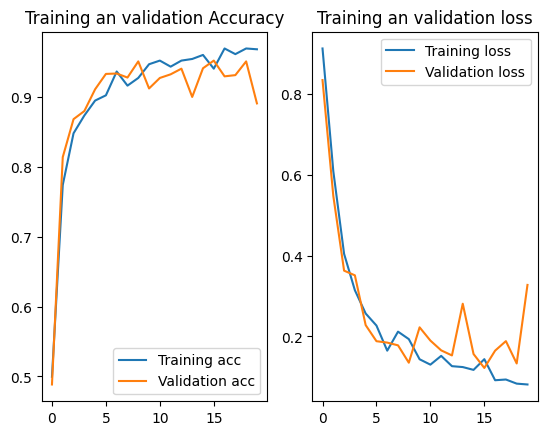

In [34]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')

plt.legend(loc='lower right')
plt.title('Training an validation Accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.legend(loc='upper right')
plt.title('Training an validation loss')

plt.show()

First image to predict
Actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Early_blight


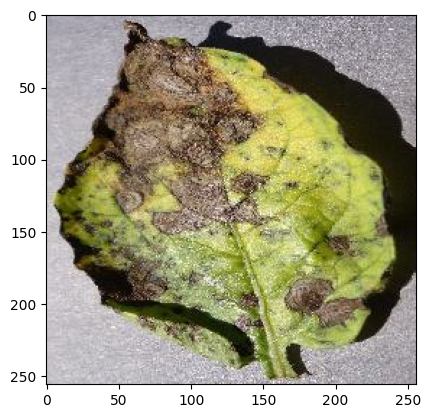

In [35]:
import numpy as np

for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    print(plt.imshow(first_image))
    print('Actual label:', class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('Predicted label:', class_names[np.argmax(batch_prediction[0])])

In [36]:
# CREATING FUNCTION TO RETURN PREDICTED CLASS AND PROBABLITY OF CLASS

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 77ms/step


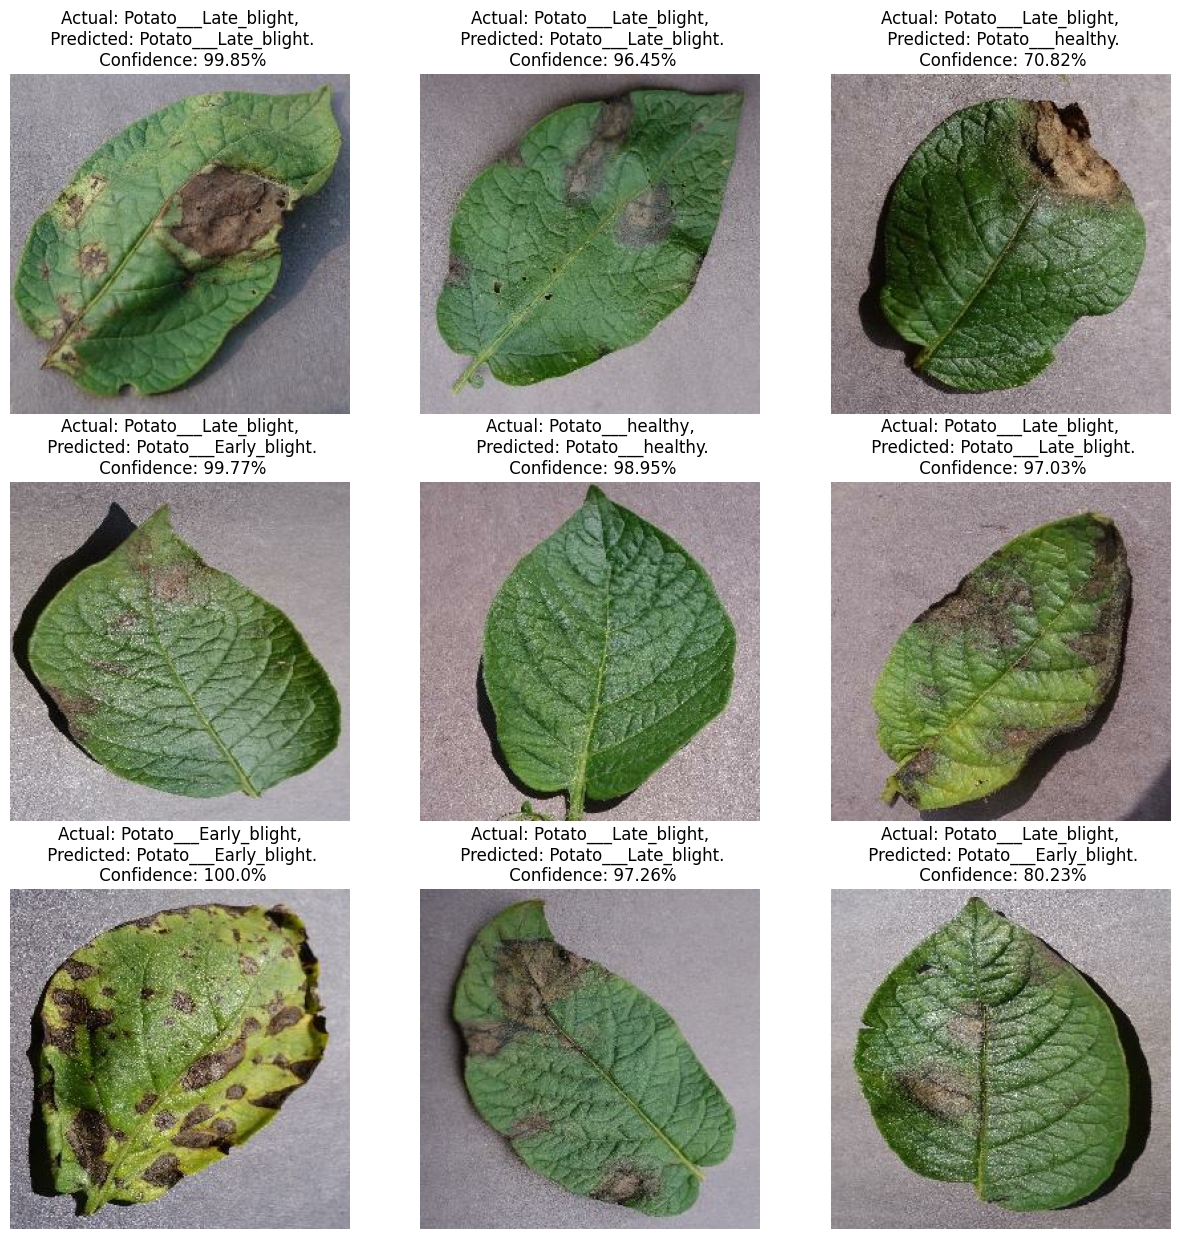

In [37]:
#PLOTTING IMAGES WITH PREDICTED LABEL AND TRUE LABEL
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    # break

In [38]:
model_version = 1
model.save(f'saved_models/{model_version}')

INFO:tensorflow:Assets written to: saved_models/1\assets


INFO:tensorflow:Assets written to: saved_models/1\assets
